# Final Analysis Framework v2.0 - Focused Results Analysis

This analysis framework focuses on understanding the experimental results from the construction invoice processing study, incorporating controlled experimental design considerations and practical system improvement insights.


## Setup


### Requirements Installation and Verification


In [1]:
import subprocess
import sys
import os
from pathlib import Path
import time

def find_requirements_file():
    """Find the requirements_analysis.txt file in expected locations."""
    requirements_paths = [
        Path('./requirements/requirements_analysis.txt'),
        Path('../requirements/requirements_analysis.txt'),
        Path('../../requirements/requirements_analysis.txt'),
        Path('./Deliverables-Code/requirements/requirements_analysis.txt')
    ]
    
    for path in requirements_paths:
        if path.exists():
            return path
    
    return None

def read_requirements_file(requirements_file):
    """Read and parse the requirements file."""
    try:
        with open(requirements_file, 'r') as f:
            requirements_content = f.read().strip().split('\n')
        
        # Filter out comments and empty lines
        requirements_list = [
            req.strip() for req in requirements_content 
            if req.strip() and not req.strip().startswith('#')
        ]
        
        return requirements_list
    except Exception as e:
        print(f"❌ Error reading requirements file: {e}")
        return []

def install_package(requirement, index, total):
    """Install a single package with progress reporting."""
    package_name = requirement.split('>=')[0].split('==')[0].split('[')[0]
    print(f"\n[{index}/{total}] Installing {package_name}...")
    print(f"   Full requirement: {requirement}")
    
    start_time = time.time()
    try:
        result = subprocess.run([
            sys.executable, '-m', 'pip', 'install', requirement, '--timeout', '120'
        ], capture_output=True, text=True, timeout=180)  # 3 minute timeout per package
        
        elapsed_time = time.time() - start_time
        
        if result.returncode == 0:
            print(f"   ✅ {package_name} installed successfully ({elapsed_time:.1f}s)")
            return True, package_name
        else:
            print(f"   ❌ Failed to install {package_name}")
            if result.stderr:
                print(f"   Error: {result.stderr[:200]}...")
            return False, package_name
            
    except subprocess.TimeoutExpired:
        print(f"   ⏰ Timeout installing {package_name} (>3 minutes)")
        return False, package_name
    except Exception as e:
        print(f"   ❌ Exception installing {package_name}: {e}")
        return False, package_name

def install_requirements():
    """Install all requirements from the requirements file."""
    # Find requirements file
    requirements_file = find_requirements_file()
    if not requirements_file:
        print("❌ requirements_analysis.txt not found in any expected location")
        print("Expected locations:")
        for path in [Path('./requirements/requirements_analysis.txt'),
                    Path('../requirements/requirements_analysis.txt'),
                    Path('../../requirements/requirements_analysis.txt'),
                    Path('./Deliverables-Code/requirements/requirements_analysis.txt')]:
            print(f"   - {path}")
        return False
    
    print(f"✓ Found requirements file: {requirements_file}")
    
    # Read requirements
    requirements_list = read_requirements_file(requirements_file)
    if not requirements_list:
        print("❌ No valid requirements found in file")
        return False
    
    print(f"\n📦 Installing {len(requirements_list)} packages from requirements file...")
    print("=" * 60)
    
    # Install each requirement
    failed_packages = []
    successful_packages = []
    
    for i, requirement in enumerate(requirements_list, 1):
        success, package_name = install_package(requirement, i, len(requirements_list))
        if success:
            successful_packages.append(package_name)
        else:
            failed_packages.append(package_name)
    
    # Summary
    print("\n" + "=" * 60)
    print(f"📊 Installation Summary:")
    print(f"   ✅ Successful: {len(successful_packages)}")
    print(f"   ❌ Failed: {len(failed_packages)}")
    
    if successful_packages:
        print(f"\n   Successfully installed: {', '.join(successful_packages[:5])}")
        if len(successful_packages) > 5:
            print(f"   ... and {len(successful_packages) - 5} more")
    
    if failed_packages:
        print(f"\n   ⚠️  Failed packages: {', '.join(failed_packages)}")
        print("   You may need to install these manually or check for dependency conflicts.")
    
    return len(failed_packages) == 0

def check_package_installed(package_name):
    """Check if a package is already installed."""
    try:
        result = subprocess.run([
            sys.executable, '-m', 'pip', 'show', package_name
        ], capture_output=True, text=True)
        return result.returncode == 0
    except:
        return False

def show_pre_installation_status():
    """Show which key packages are already installed."""
    check_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 
                     'scikit-learn', 'statsmodels', 'tqdm', 'pyyaml']
    
    print("🔍 Checking current package status...")
    print("-" * 50)
    
    already_installed = []
    need_installation = []
    
    for package in check_packages:
        if check_package_installed(package):
            print(f"✅ {package:<15} - Already installed")
            already_installed.append(package)
        else:
            print(f"❌ {package:<15} - Needs installation")
            need_installation.append(package)
    
    print(f"\n📊 Status Summary:")
    print(f"   Already installed: {len(already_installed)}")
    print(f"   Need installation: {len(need_installation)}")
    
    if need_installation:
        print(f"   Packages to install: {', '.join(need_installation)}")
    
    return already_installed, need_installation

def verify_imports():
    """Verify that key libraries can be imported."""
    required_libraries = {
        'pandas': 'pd',
        'numpy': 'np', 
        'matplotlib.pyplot': 'plt',
        'seaborn': 'sns',
        'scipy': 'scipy',
        'pathlib': 'pathlib',
        'json': 'json',
        'yaml': 'yaml',
        'sklearn': 'sklearn',
        'statsmodels.api': 'sm'
    }
    
    print("\n🔍 Verifying library imports...")
    print("-" * 40)
    failed_imports = []
    
    for lib, alias in required_libraries.items():
        try:
            __import__(lib)
            print(f"✅ {lib:<20} - OK")
        except ImportError as e:
            print(f"❌ {lib:<20} - FAILED: {str(e)[:50]}...")
            failed_imports.append(lib)
    
    if failed_imports:
        print(f"\n⚠️  Warning: {len(failed_imports)} libraries failed to import")
        print("   Failed libraries:", ', '.join(failed_imports))
        print("   You may need to restart the kernel after installation")
    else:
        print("\n✅ All required libraries verified successfully")
    
    return len(failed_imports) == 0

# Run installation and verification with progress tracking
print("=" * 70)
print("🚀 Analysis Requirements Installation & Verification")
print("=" * 70)

# Show pre-installation status
already_installed, need_installation = show_pre_installation_status()

# Proceed with installation
print(f"\n⏱️  Starting installation process at {time.strftime('%H:%M:%S')}")
start_total = time.time()

installation_success = install_requirements()

total_time = time.time() - start_total
print(f"\n⏱️  Total installation time: {total_time:.1f} seconds")

# Verify installation
verification_success = verify_imports()

print("\n" + "=" * 70)
if installation_success and verification_success:
    print("🎉 Setup complete! Ready to proceed with analysis.")
elif installation_success:
    print("⚠️  Installation complete but some imports failed. You may need to restart the kernel.")
else:
    print("❌ Installation had issues. Please check the error messages above.")
print("=" * 70)

🚀 Analysis Requirements Installation & Verification
🔍 Checking current package status...
--------------------------------------------------
✅ pandas          - Already installed
✅ numpy           - Already installed
✅ matplotlib      - Already installed
✅ seaborn         - Already installed
✅ scipy           - Already installed
✅ scikit-learn    - Already installed
✅ statsmodels     - Already installed
✅ tqdm            - Already installed
✅ pyyaml          - Already installed

📊 Status Summary:
   Already installed: 9
   Need installation: 0

⏱️  Starting installation process at 13:37:10
✓ Found requirements file: ..\requirements\requirements_analysis.txt

📦 Installing 13 packages from requirements file...

[1/13] Installing pandas...
   Full requirement: pandas>=1.5.0
   ✅ pandas installed successfully (1.5s)

[2/13] Installing numpy...
   Full requirement: numpy>=1.21.0
   ✅ numpy installed successfully (1.6s)

[3/13] Installing matplotlib...
   Full requirement: matplotlib>=3.5.0
 

### Root Directory Detection


In [2]:
def find_project_root():
    """
    Find project root by locating directory containing .gitignore and .gitattributes.
    Similar to implementation in 03_pixtral_model.py
    """
    from pathlib import Path
    import sys
    
    try:
        # When running as a script, start from script location
        start_path = Path(__file__).parent
    except NameError:
        # When running in a notebook, start from current working directory
        start_path = Path.cwd()
    
    # Walk up the directory tree to find git markers
    current_path = start_path
    while current_path != current_path.parent:  # Stop at filesystem root
        if (current_path / ".gitignore").exists() and (current_path / ".gitattributes").exists():
            return current_path
        current_path = current_path.parent
    
    raise RuntimeError("Could not find project root (directory containing .gitignore and .gitattributes)")

def setup_project_paths():
    """Set up all project directory paths and verify they exist."""
    global ROOT_DIR, DELIVERABLES_DIR, DATA_DIR, RESULTS_DIR, ANALYSIS_DIR, CONFIG_DIR
    
    # Find and set root directory
    ROOT_DIR = find_project_root()
    print(f"✓ Found project root: {ROOT_DIR}")
    
    # Set up key directories
    DELIVERABLES_DIR = ROOT_DIR / "Deliverables-Code"
    DATA_DIR = DELIVERABLES_DIR / "data"
    RESULTS_DIR = DELIVERABLES_DIR / "results"
    ANALYSIS_DIR = DELIVERABLES_DIR / "analysis"
    CONFIG_DIR = DELIVERABLES_DIR / "config"
    
    # Verify expected directories exist
    required_dirs = {
        "Deliverables-Code": DELIVERABLES_DIR,
        "data": DATA_DIR,
        "results": RESULTS_DIR,
        "analysis": ANALYSIS_DIR,
        "config": CONFIG_DIR
    }
    
    missing_dirs = []
    for name, path in required_dirs.items():
        if path.exists():
            print(f"✓ Found {name} directory: {path}")
        else:
            print(f"⚠ Missing {name} directory: {path}")
            missing_dirs.append(name)
    
    if missing_dirs:
        print(f"\n⚠ Warning: {len(missing_dirs)} required directories not found")
        print("This may indicate the notebook is being run from an unexpected location")
    else:
        print("\n✓ All project directories located successfully")
    
    # Create analysis directory if it doesn't exist
    ANALYSIS_DIR.mkdir(parents=True, exist_ok=True)
    
    # Add project root to Python path for imports
    import sys
    if str(ROOT_DIR) not in sys.path:
        sys.path.append(str(ROOT_DIR))
        print(f"✓ Added project root to Python path")
    
    return ROOT_DIR

def display_project_structure():
    """Display relevant project structure for reference."""
    print("\n=== Project Structure (Key Directories) ===")
    print(f"ROOT_DIR:         {ROOT_DIR}")
    print(f"DELIVERABLES_DIR: {DELIVERABLES_DIR}")
    print(f"DATA_DIR:         {DATA_DIR}")
    print(f"RESULTS_DIR:      {RESULTS_DIR}")
    print(f"ANALYSIS_DIR:     {ANALYSIS_DIR}")
    print(f"CONFIG_DIR:       {CONFIG_DIR}")
    
    # Show counts of files in key directories
    if RESULTS_DIR.exists():
        result_files = list(RESULTS_DIR.glob("*.json"))
        print(f"\nResult files found: {len(result_files)}")
        
    if ANALYSIS_DIR.exists():
        analysis_files = list(ANALYSIS_DIR.glob("*.json"))
        print(f"Analysis files found: {len(analysis_files)}")
        
    if (DATA_DIR / "images" / "metadata").exists():
        metadata_files = list((DATA_DIR / "images" / "metadata").glob("*.csv"))
        print(f"Metadata files found: {len(metadata_files)}")

# Run root directory detection and path setup
print("=== Root Directory Detection & Path Setup ===")
project_root = setup_project_paths()
display_project_structure()

print(f"\n🎯 Ready to proceed with analysis from: {ROOT_DIR.name}")

=== Root Directory Detection & Path Setup ===
✓ Found project root: d:\UCSD_MJM
✓ Found Deliverables-Code directory: d:\UCSD_MJM\Deliverables-Code
✓ Found data directory: d:\UCSD_MJM\Deliverables-Code\data
✓ Found results directory: d:\UCSD_MJM\Deliverables-Code\results
✓ Found analysis directory: d:\UCSD_MJM\Deliverables-Code\analysis
✓ Found config directory: d:\UCSD_MJM\Deliverables-Code\config

✓ All project directories located successfully
✓ Added project root to Python path

=== Project Structure (Key Directories) ===
ROOT_DIR:         d:\UCSD_MJM
DELIVERABLES_DIR: d:\UCSD_MJM\Deliverables-Code
DATA_DIR:         d:\UCSD_MJM\Deliverables-Code\data
RESULTS_DIR:      d:\UCSD_MJM\Deliverables-Code\results
ANALYSIS_DIR:     d:\UCSD_MJM\Deliverables-Code\analysis
CONFIG_DIR:       d:\UCSD_MJM\Deliverables-Code\config

Result files found: 15
Analysis files found: 15
Metadata files found: 2

🎯 Ready to proceed with analysis from: UCSD_MJM


### Import Libraries


In [3]:
# Import standard libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, kruskal
import json
import yaml
from pathlib import Path
import warnings
from datetime import datetime
from typing import Dict, List, Tuple, Any, Optional
import re
from collections import defaultdict, Counter
import itertools

# Statistical and machine learning utilities
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Progress tracking
from tqdm import tqdm

# Configure plotting parameters and styles
plt.style.use('default')  # Start with clean default style

# Set up matplotlib and seaborn styling
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'figure.dpi': 100,
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.title_fontsize': 11,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'lines.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Custom color palette for consistent visualization
ANALYSIS_COLORS = {
    'LMM': '#2E86AB',        # Blue for LMM models
    'OCR': '#A23B72',        # Purple for OCR models
    'Pixtral': '#2E86AB',    # Blue for Pixtral
    'Llama': '#00A6D6',      # Light blue for Llama
    'DocTR': '#A23B72',      # Purple for DocTR
    'accuracy': '#28A745',    # Green for accuracy metrics
    'cer': '#DC3545',        # Red for error metrics
    'work_order': '#FD7E14',  # Orange for work order
    'total_cost': '#6F42C1',  # Purple for total cost
    'baseline': '#6C757D',    # Gray for baseline/reference
    'improvement': '#20C997'   # Teal for improvements
}

# Configure warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Display configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✓ All libraries imported successfully")
print("✓ Plotting parameters configured")
print("✓ Custom color palette defined")
print("✓ Analysis environment ready")

# Show available color palette
print(f"\n📊 Available analysis colors: {list(ANALYSIS_COLORS.keys())}")
print("🎨 Visualization settings optimized for analysis reports")

✓ All libraries imported successfully
✓ Plotting parameters configured
✓ Custom color palette defined
✓ Analysis environment ready

📊 Available analysis colors: ['LMM', 'OCR', 'Pixtral', 'Llama', 'DocTR', 'accuracy', 'cer', 'work_order', 'total_cost', 'baseline', 'improvement']
🎨 Visualization settings optimized for analysis reports


### Data Loading Functions


In [6]:
def load_ground_truth_data(ground_truth_file: str = None) -> pd.DataFrame:
    """Load and validate ground truth CSV data."""
    # Set default ground truth file path using ROOT_DIR
    if ground_truth_file is None:
        ground_truth_file = DATA_DIR / "images" / "metadata" / "ground_truth.csv"
    else:
        ground_truth_file = Path(ground_truth_file)
    
    if not ground_truth_file.exists():
        raise FileNotFoundError(f"Ground truth file not found: {ground_truth_file}")
    
    try:
        # Load with explicit string type for filename column to ensure consistent matching
        ground_truth = pd.read_csv(ground_truth_file, dtype={'filename': str})
        
        # Validate required columns
        required_columns = {'filename', 'work_order_number', 'total'}
        missing_columns = required_columns - set(ground_truth.columns)
        if missing_columns:
            raise ValueError(f"Missing required columns in ground truth: {missing_columns}")
        
        # Clean and validate data
        ground_truth['filename'] = ground_truth['filename'].str.strip()
        ground_truth['work_order_number'] = ground_truth['work_order_number'].astype(str).str.strip()
        
        print(f"INFO: Loaded ground truth data: {len(ground_truth)} records")
        return ground_truth
        
    except Exception as e:
        print(f"ERROR: Error loading ground truth data: {e}")
        raise

def discover_results_files() -> Dict[str, List[Path]]:
    """Discover all results files organized by model type."""
    print("INFO: Discovering results files")
    
    results_files = {
        'pixtral': [],
        'llama': [],
        'doctr': [],
        'all': []
    }
    
    # Get all results JSON files
    all_files = list(RESULTS_DIR.glob("results-*.json"))
    
    for file in all_files:
        results_files['all'].append(file)
        
        # Categorize by model type based on filename pattern
        if 'pixtral' in file.name:
            results_files['pixtral'].append(file)
        elif 'llama' in file.name:
            results_files['llama'].append(file)
        elif 'doctr' in file.name:
            results_files['doctr'].append(file)
    
    # Sort files by modification time (newest first)
    for model_type in results_files:
        results_files[model_type].sort(key=lambda x: x.stat().st_mtime, reverse=True)
    
    print(f"INFO: Found {len(results_files['all'])} total results files")
    for model_type, files in results_files.items():
        if model_type != 'all' and files:
            print(f"INFO:   {model_type}: {len(files)} files")
    
    return results_files

def discover_analysis_files() -> Dict[str, List[Path]]:
    """Discover all analysis files organized by model type."""
    print("INFO: Discovering analysis files")
    
    analysis_files = {
        'pixtral': [],
        'llama': [],
        'doctr': [],
        'all': []
    }
    
    # Get all analysis JSON files
    all_files = list(ANALYSIS_DIR.glob("analysis-*.json"))
    
    for file in all_files:
        analysis_files['all'].append(file)
        
        # Categorize by model type based on filename pattern
        if 'pixtral' in file.name:
            analysis_files['pixtral'].append(file)
        elif 'llama' in file.name:
            analysis_files['llama'].append(file)
        elif 'doctr' in file.name:
            analysis_files['doctr'].append(file)
    
    # Sort files by modification time (newest first)
    for model_type in analysis_files:
        analysis_files[model_type].sort(key=lambda x: x.stat().st_mtime, reverse=True)
    
    print(f"INFO: Found {len(analysis_files['all'])} total analysis files")
    for model_type, files in analysis_files.items():
        if model_type != 'all' and files:
            print(f"INFO:   {model_type}: {len(files)} files")
    
    return analysis_files

def load_results_file(file_path: Path) -> Dict[str, Any]:
    """Load and validate a results JSON file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Validate structure
        required_keys = {'metadata', 'results'}
        missing_keys = required_keys - set(data.keys())
        if missing_keys:
            raise ValueError(f"Missing required keys in results file: {missing_keys}")
        
        # Add file metadata
        data['file_info'] = {
            'filename': file_path.name,
            'file_path': str(file_path),
            'file_size_mb': round(file_path.stat().st_size / (1024*1024), 2),
            'modification_time': datetime.fromtimestamp(file_path.stat().st_mtime).isoformat()
        }
        
        return data
        
    except Exception as e:
        print(f"ERROR: Error loading results file {file_path}: {e}")
        raise

def load_analysis_file(file_path: Path) -> Dict[str, Any]:
    """Load and validate an analysis JSON file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # Validate structure
        required_keys = {'metadata', 'summary', 'extracted_data'}
        missing_keys = required_keys - set(data.keys())
        if missing_keys:
            raise ValueError(f"Missing required keys in analysis file: {missing_keys}")
        
        # Add file metadata
        data['file_info'] = {
            'filename': file_path.name,
            'file_path': str(file_path),
            'file_size_mb': round(file_path.stat().st_size / (1024*1024), 2),
            'modification_time': datetime.fromtimestamp(file_path.stat().st_mtime).isoformat()
        }
        
        return data
        
    except Exception as e:
        print(f"ERROR: Error loading analysis file {file_path}: {e}")
        raise

def load_all_results(model_types: List[str] = None) -> Dict[str, List[Dict]]:
    """Load all results files for specified model types."""
    print("INFO: Loading all results files")
    
    if model_types is None:
        model_types = ['pixtral', 'llama', 'doctr']
    
    results_files = discover_results_files()
    all_results = {}
    
    for model_type in model_types:
        if model_type in results_files:
            all_results[model_type] = []
            for file_path in results_files[model_type]:
                try:
                    result_data = load_results_file(file_path)
                    all_results[model_type].append(result_data)
                except Exception as e:
                    print(f"WARNING: Skipping corrupted results file {file_path}: {e}")
    
    total_loaded = sum(len(results) for results in all_results.values())
    print(f"INFO: Loaded {total_loaded} results files across {len(all_results)} model types")
    
    return all_results

def load_all_analysis(model_types: List[str] = None) -> Dict[str, List[Dict]]:
    """Load all analysis files for specified model types."""
    print("INFO: Loading all analysis files")
    
    if model_types is None:
        model_types = ['pixtral', 'llama', 'doctr']
    
    analysis_files = discover_analysis_files()
    all_analysis = {}
    
    for model_type in model_types:
        if model_type in analysis_files:
            all_analysis[model_type] = []
            for file_path in analysis_files[model_type]:
                try:
                    analysis_data = load_analysis_file(file_path)
                    all_analysis[model_type].append(analysis_data)
                except Exception as e:
                    print(f"WARNING: Skipping corrupted analysis file {file_path}: {e}")
    
    total_loaded = sum(len(analyses) for analyses in all_analysis.values())
    print(f"INFO: Loaded {total_loaded} analysis files across {len(all_analysis)} model types")
    
    return all_analysis

def select_files_interactive(file_type: str = "results") -> List[Path]:
    """Interactive file selection for analysis."""
    if file_type == "results":
        files_dict = discover_results_files()
        title = "Available Results Files"
    elif file_type == "analysis":
        files_dict = discover_analysis_files()
        title = "Available Analysis Files"
    else:
        raise ValueError("file_type must be 'results' or 'analysis'")
    
    all_files = files_dict['all']
    if not all_files:
        print(f"No {file_type} files found.")
        return []
    
    print(f"\n{title}:")
    print("-" * 50)
    for i, file_path in enumerate(all_files, 1):
        # Extract model info from filename
        model_info = ""
        if 'pixtral' in file_path.name:
            model_info = " [Pixtral]"
        elif 'llama' in file_path.name:
            model_info = " [Llama]"
        elif 'doctr' in file_path.name:
            model_info = " [DocTR]"
        
        # Get file modification time
        mod_time = datetime.fromtimestamp(file_path.stat().st_mtime)
        print(f"{i:2d}. {file_path.name}{model_info}")
        print(f"     Modified: {mod_time.strftime('%Y-%m-%d %H:%M:%S')}")
    
    print(f"\n{len(all_files) + 1}. Load all files")
    
    while True:
        try:
            choice = input(f"\nSelect files (comma-separated numbers, or {len(all_files) + 1} for all): ")
            
            if choice.strip() == str(len(all_files) + 1):
                return all_files
            
            # Parse comma-separated choices
            choices = [int(x.strip()) for x in choice.split(',')]
            selected_files = []
            
            for choice_num in choices:
                if 1 <= choice_num <= len(all_files):
                    selected_files.append(all_files[choice_num - 1])
                else:
                    print(f"Invalid choice: {choice_num}")
                    continue
            
            if selected_files:
                print(f"\nSelected {len(selected_files)} file(s):")
                for file_path in selected_files:
                    print(f"  - {file_path.name}")
                return selected_files
            else:
                print("No valid files selected.")
                
        except ValueError:
            print("Please enter valid numbers separated by commas.")

def create_comprehensive_dataset() -> Dict[str, Any]:
    """Create a comprehensive dataset combining all available data."""
    print("INFO: Creating comprehensive dataset")
    
    # Load ground truth
    ground_truth = load_ground_truth_data()
    
    # Load all analysis files (which contain the processed results)
    all_analysis = load_all_analysis()
    
    # Create comprehensive dataset structure
    dataset = {
        'ground_truth': ground_truth,
        'model_data': {},
        'metadata': {
            'created_timestamp': datetime.now().isoformat(),
            'total_models': 0,
            'total_experiments': 0,
            'data_sources': {
                'ground_truth_file': str(DATA_DIR / "images" / "metadata" / "ground_truth.csv"),
                'results_directory': str(RESULTS_DIR),
                'analysis_directory': str(ANALYSIS_DIR)
            }
        }
    }
    
    total_experiments = 0
    for model_type, analyses in all_analysis.items():
        if analyses:
            dataset['model_data'][model_type] = analyses
            total_experiments += len(analyses)
            print(f"INFO: Added {len(analyses)} experiments for {model_type}")
    
    dataset['metadata']['total_models'] = len(dataset['model_data'])
    dataset['metadata']['total_experiments'] = total_experiments
    
    print(f"INFO: Comprehensive dataset created with {dataset['metadata']['total_models']} models and {total_experiments} experiments")
    
    return dataset

# Initialize data loading and create comprehensive dataset
print("ℹ️  Initializing data loading functions")

# Verify data directories exist
required_dirs = [RESULTS_DIR, ANALYSIS_DIR, DATA_DIR / "images" / "metadata"]
for dir_path in required_dirs:
    if not dir_path.exists():
        print(f"WARNING: Creating missing directory: {dir_path}")
        dir_path.mkdir(parents=True, exist_ok=True)

# Discover available data files
available_results = discover_results_files()
available_analysis = discover_analysis_files()

# Load ground truth data
try:
    GROUND_TRUTH_DATA = load_ground_truth_data()
    print(f"✅ Ground truth loaded: {len(GROUND_TRUTH_DATA)} records")
except Exception as e:
    print(f"WARNING: Could not load ground truth data: {e}")
    GROUND_TRUTH_DATA = None

# Create comprehensive dataset for analysis
try:
    COMPREHENSIVE_DATASET = create_comprehensive_dataset()
    print("✅ Comprehensive dataset created successfully")
except Exception as e:
    print(f"WARNING: Could not create comprehensive dataset: {e}")
    COMPREHENSIVE_DATASET = None

# Display summary of available data
print("\n📊 Data Loading Summary:")
print(f"   • Ground truth records: {len(GROUND_TRUTH_DATA) if GROUND_TRUTH_DATA is not None else 'Not available'}")
print(f"   • Results files found: {len(available_results['all'])}")
print(f"   • Analysis files found: {len(available_analysis['all'])}")

if available_results['all']:
    print("\n   Results by model type:")
    for model_type, files in available_results.items():
        if model_type != 'all' and files:
            print(f"     - {model_type.title()}: {len(files)} files")

if available_analysis['all']:
    print("\n   Analysis by model type:")
    for model_type, files in available_analysis.items():
        if model_type != 'all' and files:
            print(f"     - {model_type.title()}: {len(files)} files")

print("\n✅ Data loading functions ready for analysis")

ℹ️  Initializing data loading functions
INFO: Discovering results files
INFO: Found 15 total results files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Loaded ground truth data: 549 records
✅ Ground truth loaded: 549 records
INFO: Creating comprehensive dataset
INFO: Loaded ground truth data: 549 records
INFO: Loading all analysis files
INFO: Discovering analysis files
INFO: Found 15 total analysis files
INFO:   pixtral: 4 files
INFO:   llama: 4 files
INFO:   doctr: 7 files
INFO: Loaded 15 analysis files across 3 model types
INFO: Added 4 experiments for pixtral
INFO: Added 4 experiments for llama
INFO: Added 7 experiments for doctr
INFO: Comprehensive dataset created with 3 models and 15 experiments
✅ Comprehensive dataset created successfully

📊 Data Loading Summary:
   • Ground truth records: 549
   • Results file

## Section 1: Executive Summary


### Experimental Design & Controlled Variables

*Placeholder for discussion of controlled experimental design, image quality control, content standardization, and design rationale.*


### Cell 1.1: Project Context & Key Findings


🎯 PRIMARY PERFORMANCE COMPARISON SUMMARY
Large Multimodal Models (LMM):     76.8%
Optical Character Recognition:     43.4%
Performance Difference:            +33.3%

Individual Model Breakdown:
  Pixtral    (LMM): 75.8%
  Llama      (LMM): 77.8%
  Doctr      (OCR): 43.4%

Models meeting 85% threshold: 0/2


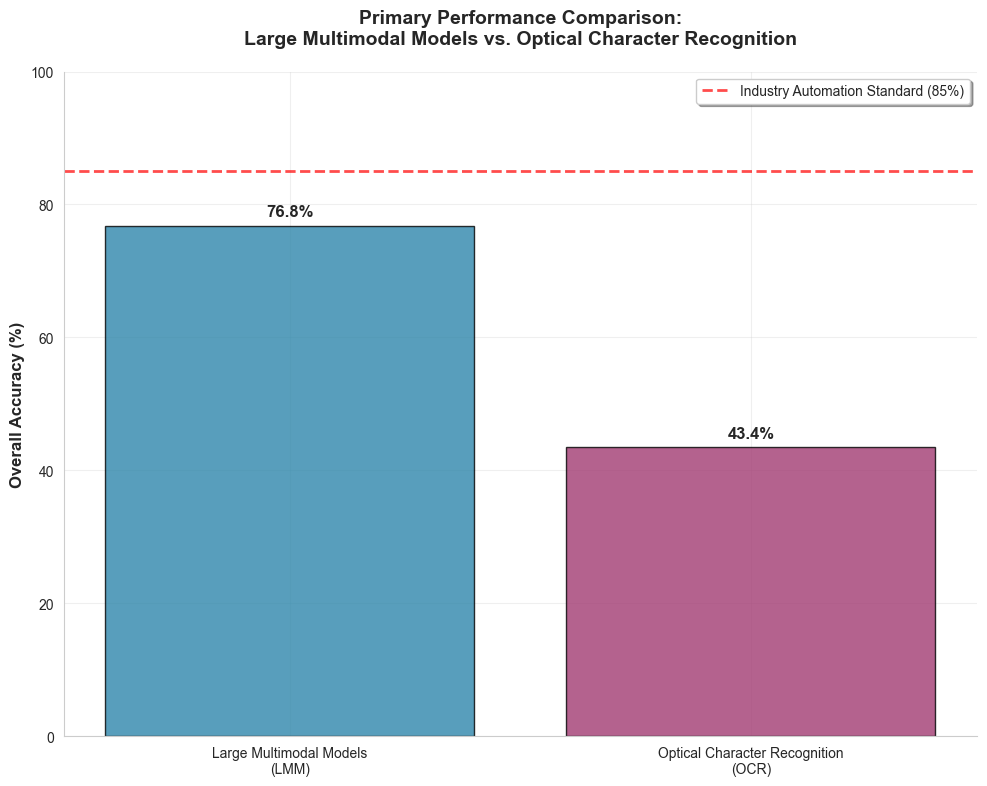

In [8]:
# Create Primary Performance Comparison Bar Chart
# Side-by-side comparison of total accuracy for all LMM trials vs all OCR trials
# Roll up across all prompts and queries

def calculate_model_accuracies(comprehensive_dataset):
    """Calculate rolled-up accuracy for each model across all experiments."""
    model_accuracies = {}
    
    # Process each model type
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        accuracies = []
        
        for experiment in experiments:
            if 'summary' in experiment:
                summary = experiment['summary']
                
                # The analysis files store accuracy directly in summary
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    accuracies.append(summary['work_order_accuracy'])
                    accuracies.append(summary['total_cost_accuracy'])
        
        # Calculate mean accuracy for this model
        if accuracies:
            model_accuracies[model_type] = np.mean(accuracies)
        else:
            model_accuracies[model_type] = 0.0
    
    return model_accuracies

def create_primary_performance_comparison():
    """Create the primary performance comparison bar chart."""
    
    # Calculate individual model accuracies
    model_accuracies = calculate_model_accuracies(COMPREHENSIVE_DATASET)
    
    # Categorize models into LMM vs OCR
    lmm_models = ['pixtral', 'llama']
    ocr_models = ['doctr']
    
    # Calculate category averages
    lmm_accuracies = [model_accuracies.get(model, 0) for model in lmm_models if model in model_accuracies and model_accuracies[model] > 0]
    ocr_accuracies = [model_accuracies.get(model, 0) for model in ocr_models if model in model_accuracies and model_accuracies[model] > 0]
    
    # Calculate rolled-up averages
    avg_lmm_accuracy = np.mean(lmm_accuracies) if lmm_accuracies else 0
    avg_ocr_accuracy = np.mean(ocr_accuracies) if ocr_accuracies else 0
    
    # Prepare data for plotting
    categories = ['Large Multimodal Models\n(LMM)', 'Optical Character Recognition\n(OCR)']
    accuracies = [avg_lmm_accuracy * 100, avg_ocr_accuracy * 100]  # Convert to percentage
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define colors for categories
    colors = [ANALYSIS_COLORS['LMM'], ANALYSIS_COLORS['OCR']]
    
    # Create bars
    bars = ax.bar(categories, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add the 85% industry standard reference line
    ax.axhline(y=85, color='red', linestyle='--', linewidth=2, alpha=0.7, 
               label='Industry Automation Standard (85%)')
    
    # Customize the chart
    ax.set_ylabel('Overall Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title('Primary Performance Comparison:\nLarge Multimodal Models vs. Optical Character Recognition', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_ylim(0, 100)
    
    # Add value labels on top of bars
    for bar, accuracy in zip(bars, accuracies):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{accuracy:.1f}%', ha='center', va='bottom', 
                fontsize=12, fontweight='bold')
    
    # Add grid for better readability
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)
    
    # Add legend
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    # Style the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Display summary statistics
    print("🎯 PRIMARY PERFORMANCE COMPARISON SUMMARY")
    print("=" * 50)
    print(f"Large Multimodal Models (LMM):     {avg_lmm_accuracy*100:.1f}%")
    print(f"Optical Character Recognition:     {avg_ocr_accuracy*100:.1f}%")
    print(f"Performance Difference:            {(avg_lmm_accuracy - avg_ocr_accuracy)*100:+.1f}%")
    print()
    print("Individual Model Breakdown:")
    for model, accuracy in model_accuracies.items():
        category = "LMM" if model in lmm_models else "OCR"
        print(f"  {model.title():<10} ({category}): {accuracy*100:.1f}%")
    print()
    print(f"Models meeting 85% threshold: {sum(1 for acc in accuracies if acc >= 85)}/2")
    
    return fig, model_accuracies

# Execute the analysis
if COMPREHENSIVE_DATASET is not None:
    fig, model_accuracies = create_primary_performance_comparison()
    plt.show()
else:
    print("❌ Cannot create chart: Comprehensive dataset not available")

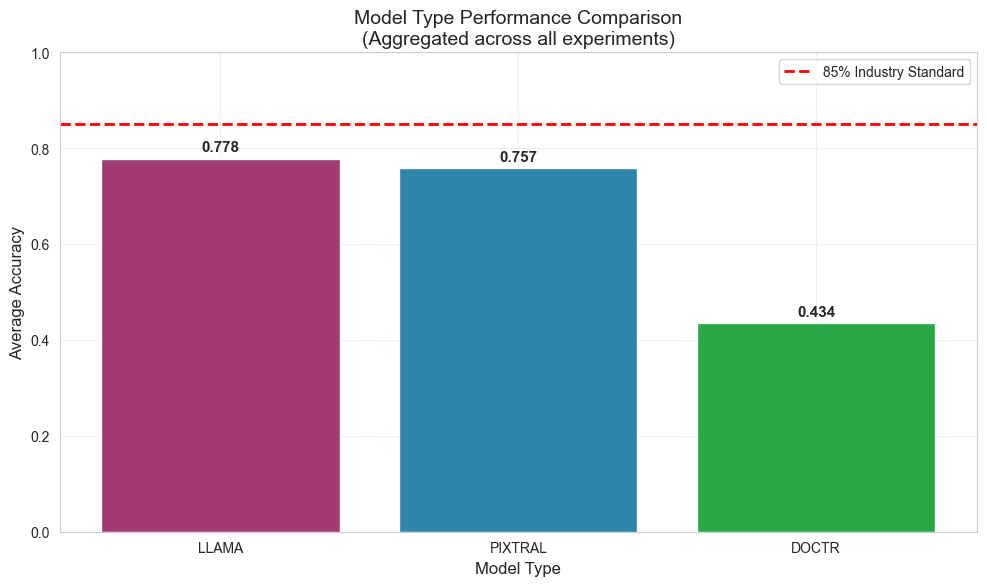

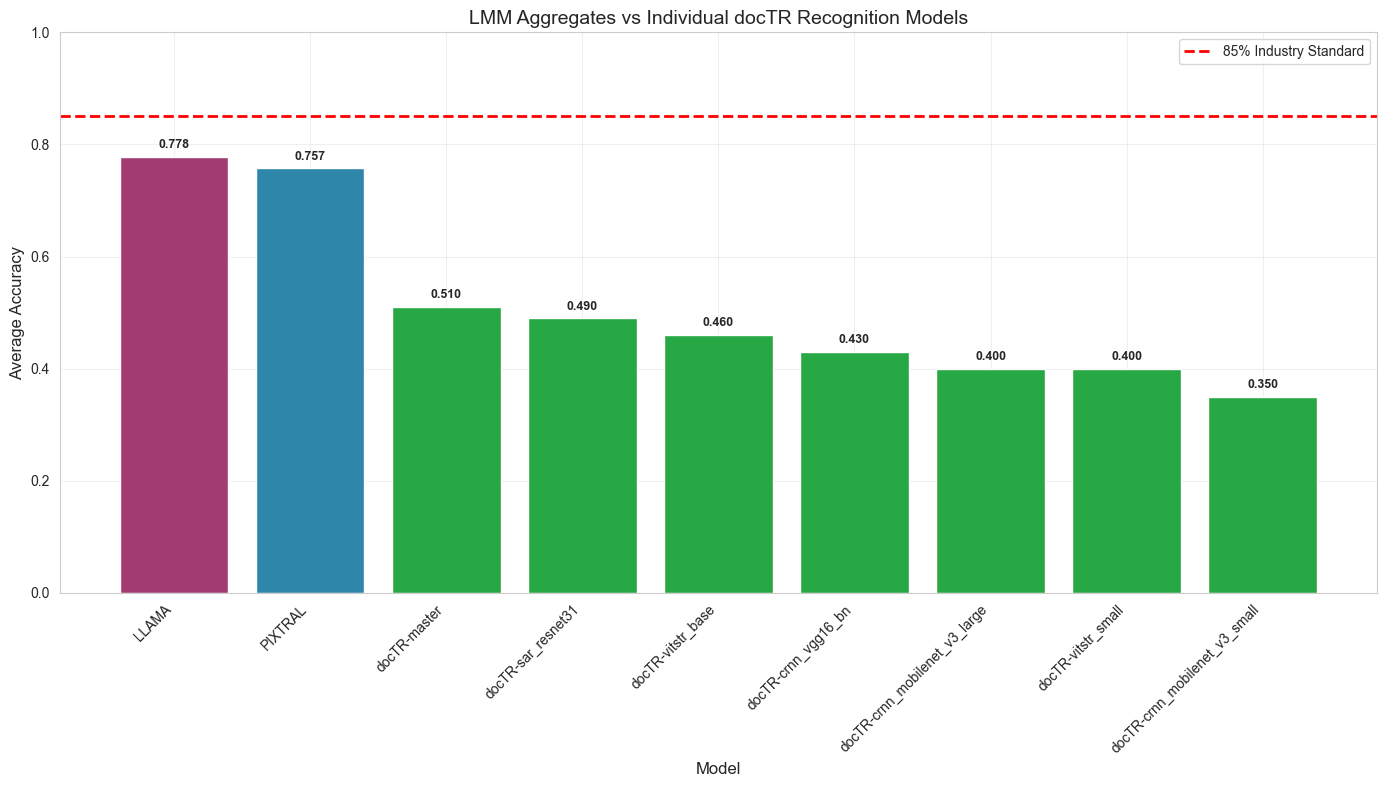

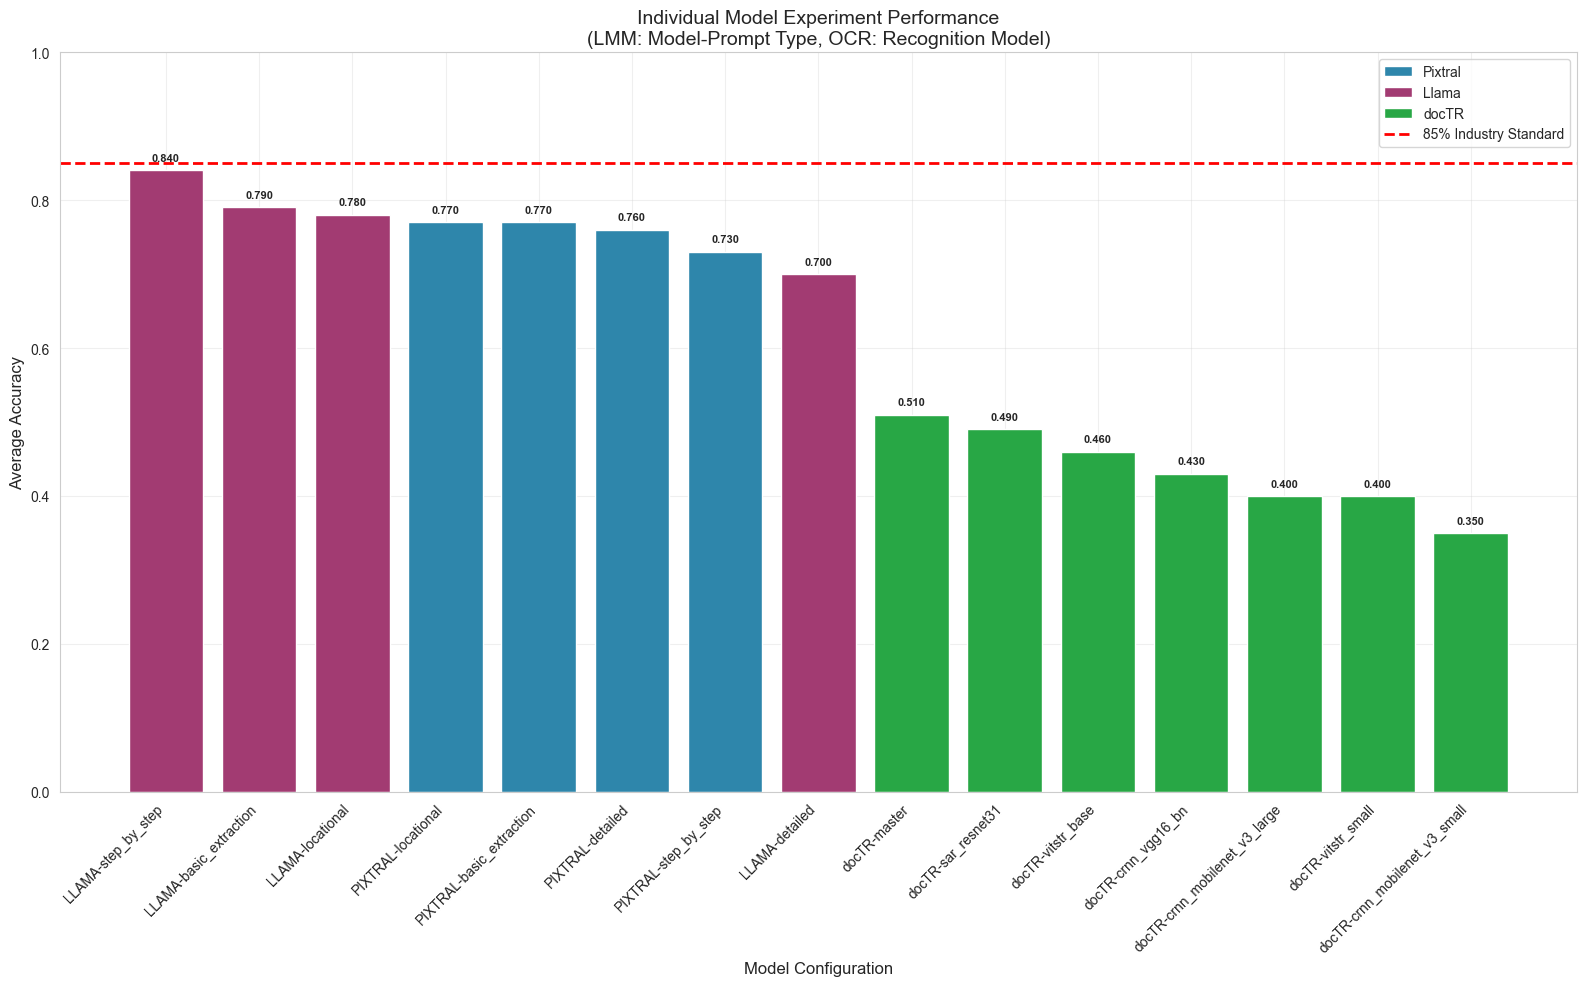

In [15]:
# Create Model Type Breakdown Bar Chart
# Break down into model types within each category
# (LMM-Pixtral, LMM-Llama, OCR with all 7 recognition models)
# Group by category and order by performance

def get_model_aggregate_performances(comprehensive_dataset):
    """Get aggregate performance for each model type."""
    model_aggregates = {}
    
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        accuracies = []
        
        for experiment in experiments:
            if 'summary' in experiment:
                summary = experiment['summary']
                
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    accuracies.append(avg_accuracy)
        
        if accuracies:
            model_aggregates[model_type] = np.mean(accuracies)
    
    return model_aggregates

def get_lmm_vs_doctr_recognition_performances(comprehensive_dataset):
    """Get LMM aggregate vs individual doctr recognition model performances."""
    performances = {}
    
    # Get LMM aggregates
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        if model_type in ['pixtral', 'llama']:
            accuracies = []
            for experiment in experiments:
                if 'summary' in experiment:
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        accuracies.append(avg_accuracy)
            
            if accuracies:
                performances[model_type.upper()] = np.mean(accuracies)
    
    # Get individual doctr recognition models
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        if model_type == 'doctr':
            for experiment in experiments:
                if 'summary' in experiment and 'metadata' in experiment:
                    summary = experiment['summary']
                    metadata = experiment['metadata']
                    
                    if ('work_order_accuracy' in summary and 'total_cost_accuracy' in summary and
                        'model_info' in metadata and 'model_id' in metadata['model_info']):
                        
                        recognition_model = metadata['model_info']['model_id']['recognition_model']
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        performances[f"docTR-{recognition_model}"] = avg_accuracy
    
    return performances

def get_individual_model_performances(comprehensive_dataset):
    """Get individual performance for each model experiment."""
    individual_performances = []
    
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for i, experiment in enumerate(experiments, 1):
            if 'summary' in experiment:
                summary = experiment['summary']
                
                if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                    
                    # Create label based on model type
                    if model_type == 'doctr':
                        if 'metadata' in experiment and 'model_info' in experiment['metadata']:
                            recognition_model = experiment['metadata']['model_info']['model_id']['recognition_model']
                            label = f"docTR-{recognition_model}"
                        else:
                            label = f"docTR-{i}"
                    else:
                        # For LMM models, get prompt type from metadata
                        if 'metadata' in experiment and 'prompt_info' in experiment['metadata']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                            label = f"{model_type.upper()}-{prompt_type}"
                        else:
                            label = f"{model_type.upper()}-{i}"
                    
                    individual_performances.append({
                        'model': label,
                        'accuracy': avg_accuracy,
                        'model_type': model_type
                    })
    
    return individual_performances

# Execute the analysis only if dataset is available
if COMPREHENSIVE_DATASET is not None:
    # Chart 1: Model Type Aggregates (Pixtral, Llama, docTR)
    model_aggregates = get_model_aggregate_performances(COMPREHENSIVE_DATASET)
    
    # Sort by accuracy in descending order
    sorted_aggregates = sorted(model_aggregates.items(), key=lambda x: x[1], reverse=True)
    sorted_names = [item[0] for item in sorted_aggregates]
    sorted_values = [item[1] for item in sorted_aggregates]
    
    # Assign colors based on model type
    color_map = {'pixtral': '#2E86AB', 'llama': '#A23B72', 'doctr': '#28A745'}
    sorted_colors = [color_map[name] for name in sorted_names]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(sorted_values)), sorted_values, color=sorted_colors)

    plt.xlabel('Model Type')
    plt.ylabel('Average Accuracy')
    plt.title('Model Type Performance Comparison\n(Aggregated across all experiments)')
    plt.xticks(range(len(sorted_names)), [name.upper() for name in sorted_names])
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, sorted_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Chart 2: LMM Aggregates vs Individual docTR Recognition Models
    lmm_vs_doctr = get_lmm_vs_doctr_recognition_performances(COMPREHENSIVE_DATASET)
    
    # Sort by accuracy in descending order
    sorted_lmm_doctr = sorted(lmm_vs_doctr.items(), key=lambda x: x[1], reverse=True)
    categories = [item[0] for item in sorted_lmm_doctr]
    values = [item[1] for item in sorted_lmm_doctr]
    
    # Assign colors based on model type
    colors = []
    for model in categories:
        if 'docTR' in model:
            colors.append('#28A745')  # Green for docTR
        elif 'PIXTRAL' in model:
            colors.append('#2E86AB')  # Blue for Pixtral
        else:  # LLAMA
            colors.append('#A23B72')  # Purple for Llama

    plt.figure(figsize=(14, 8))
    bars = plt.bar(range(len(categories)), values, color=colors)

    plt.xlabel('Model')
    plt.ylabel('Average Accuracy')
    plt.title('LMM Aggregates vs Individual docTR Recognition Models')
    plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Chart 3: Individual Model Experiments
    individual_performances = get_individual_model_performances(COMPREHENSIVE_DATASET)

    # Sort by accuracy in descending order
    individual_performances.sort(key=lambda x: x['accuracy'], reverse=True)

    plt.figure(figsize=(16, 10))
    models = [p['model'] for p in individual_performances]
    accuracies = [p['accuracy'] for p in individual_performances]
    
    # Color by specific model type (pixtral, llama, doctr)
    color_map = {'pixtral': '#2E86AB', 'llama': '#A23B72', 'doctr': '#28A745'}
    colors = [color_map[p['model_type']] for p in individual_performances]

    bars = plt.bar(range(len(models)), accuracies, color=colors)

    plt.xlabel('Model Configuration')
    plt.ylabel('Average Accuracy')
    plt.title('Individual Model Experiment Performance\n(LMM: Model-Prompt Type, OCR: Recognition Model)')
    plt.xticks(range(len(models)), models, rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add 85% reference line
    plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='85% Industry Standard')

    # Add value labels on bars
    for bar, value in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                 f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#2E86AB', label='Pixtral'),
                       Patch(facecolor='#A23B72', label='Llama'),
                       Patch(facecolor='#28A745', label='docTR'),
                       plt.Line2D([0], [0], color='red', linestyle='--', label='85% Industry Standard')]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Cannot create charts: Comprehensive dataset not available")

*Placeholder for key findings discussion and business case establishment.*


## Section 2: Cross-Model Performance Comparison


### Cell 2.1: Comprehensive Model Performance Analysis


2025-06-22 14:35:06 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x0000026D4E3088C0>


🔍 Creating LMM Models vs Prompts Accuracy Heatmap...


2025-06-22 14:35:06 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=16.0.
2025-06-22 14:35:06 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='d:\\UCSD_MJM\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
2025-06-22 14:35:06 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='d:\\UCSD_MJM\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.05
2025-06-22 14:35:06 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='d:\\UCSD_MJM\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, st

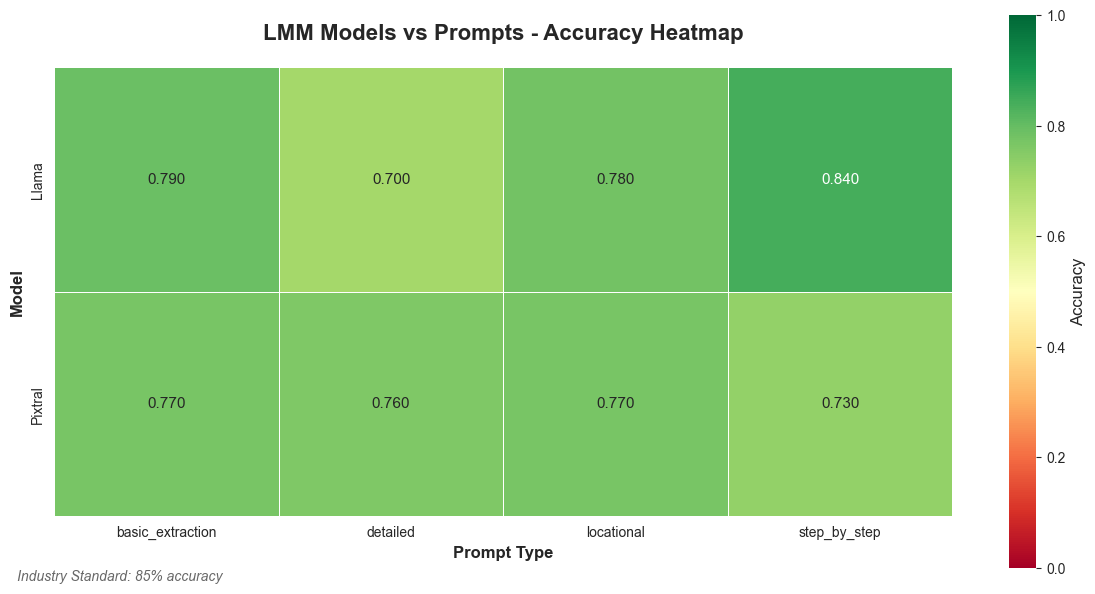


📊 LMM Models vs Prompts Accuracy Summary:

Llama:
  Best prompt: step_by_step (0.840)
  Worst prompt: detailed (0.700)
  Average: 0.777
  Range: 0.140

Pixtral:
  Best prompt: basic_extraction (0.770)
  Worst prompt: step_by_step (0.730)
  Average: 0.757
  Range: 0.040

📈 Overall Statistics:
  Best combination: ('Llama', 'step_by_step') (0.840)
  Worst combination: ('Llama', 'detailed') (0.700)
  Average across all: 0.768
  Above 85% standard: 0/8 combinations


In [17]:
# Create LMM Models vs Prompts Heatmap (Accuracy)
# Pixtral/Llama (rows) × Prompt types (columns) with accuracy values

def create_lmm_prompt_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Models vs Prompts heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata - corrected location
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Calculate average accuracy
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        avg_accuracy = (summary['work_order_accuracy'] + summary['total_cost_accuracy']) / 2
                        
                        # Store in heatmap structure
                        model_name = model_type.title()
                        if model_name not in heatmap_data:
                            heatmap_data[model_name] = {}
                        
                        if prompt_type:
                            heatmap_data[model_name][prompt_type] = avg_accuracy
    
    return heatmap_data

def plot_lmm_prompt_accuracy_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Models vs Prompts accuracy."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, prompts in heatmap_data.items():
        for prompt, accuracy in prompts.items():
            df_data.append({
                'Model': model,
                'Prompt': prompt,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for LMM Models vs Prompts heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap
    pivot_df = df.pivot(index='Model', columns='Prompt', values='Accuracy')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Models vs Prompts - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Model', fontsize=12, fontweight='bold')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Models vs Prompts Accuracy Summary:")
    print("=" * 50)
    
    for model in pivot_df.index:
        print(f"\n{model}:")
        model_data = pivot_df.loc[model].dropna()
        if not model_data.empty:
            print(f"  Best prompt: {model_data.idxmax()} ({model_data.max():.3f})")
            print(f"  Worst prompt: {model_data.idxmin()} ({model_data.min():.3f})")
            print(f"  Average: {model_data.mean():.3f}")
            print(f"  Range: {model_data.max() - model_data.min():.3f}")
    
    # Overall statistics
    all_accuracies = pivot_df.values.flatten()
    all_accuracies = all_accuracies[~pd.isna(all_accuracies)]
    
    print(f"\n📈 Overall Statistics:")
    print(f"  Best combination: {pivot_df.stack().idxmax()} ({pivot_df.stack().max():.3f})")
    print(f"  Worst combination: {pivot_df.stack().idxmin()} ({pivot_df.stack().min():.3f})")
    print(f"  Average across all: {np.mean(all_accuracies):.3f}")
    print(f"  Above 85% standard: {np.sum(all_accuracies >= 0.85)}/{len(all_accuracies)} combinations")

# Execute the analysis
print("🔍 Creating LMM Models vs Prompts Accuracy Heatmap...")
heatmap_data = create_lmm_prompt_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_accuracy_heatmap(heatmap_data)

2025-06-22 14:36:57 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x0000026D4C40CEF0>


🔍 Creating LMM Models vs Prompts CER Heatmap...


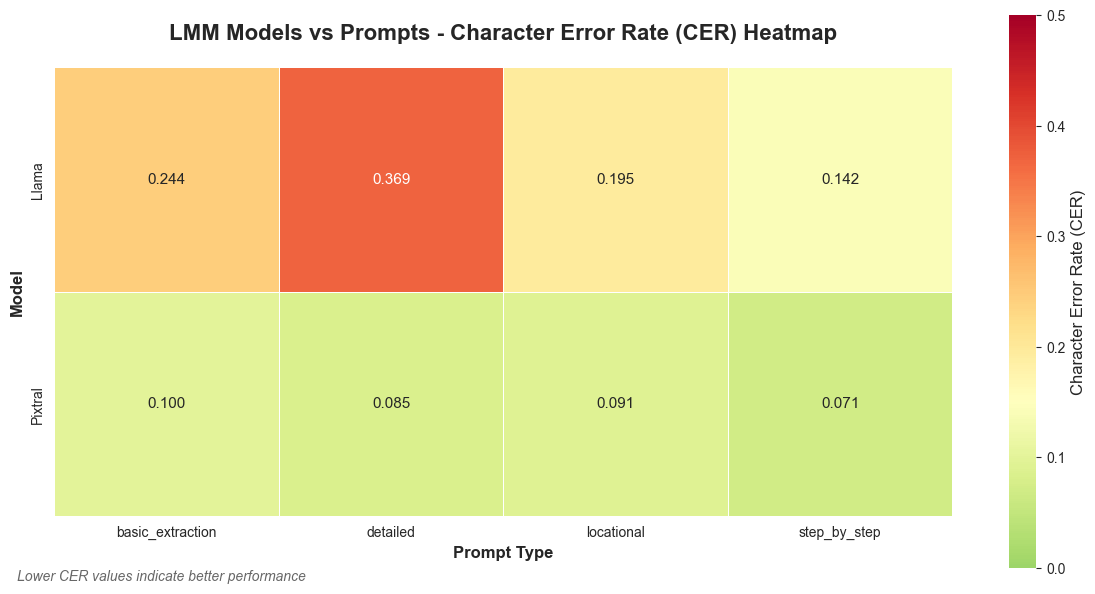


📊 LMM Models vs Prompts CER Summary:

Llama:
  Best prompt (lowest CER): step_by_step (0.142)
  Worst prompt (highest CER): detailed (0.369)
  Average CER: 0.237
  Range: 0.228

Pixtral:
  Best prompt (lowest CER): step_by_step (0.071)
  Worst prompt (highest CER): basic_extraction (0.100)
  Average CER: 0.087
  Range: 0.030

📈 Overall CER Statistics:
  Best combination (lowest CER): ('Pixtral', 'step_by_step') (0.071)
  Worst combination (highest CER): ('Llama', 'detailed') (0.369)
  Average CER across all: 0.162
  Excellent performance (CER < 0.1): 3/8 combinations
  Good performance (CER < 0.2): 6/8 combinations


In [18]:
# Create LMM Models vs Prompts Heatmap (CER)
# Pixtral/Llama (rows) × Prompt types (columns) with CER values

def create_lmm_prompt_cer_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Models vs Prompts CER heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get CER from summary
                    summary = experiment['summary']
                    if 'average_cer' in summary:
                        cer = summary['average_cer']
                        
                        # Store in heatmap structure
                        model_name = model_type.title()
                        if model_name not in heatmap_data:
                            heatmap_data[model_name] = {}
                        
                        if prompt_type:
                            heatmap_data[model_name][prompt_type] = cer
    
    return heatmap_data

def plot_lmm_prompt_cer_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Models vs Prompts CER."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, prompts in heatmap_data.items():
        for prompt, cer in prompts.items():
            df_data.append({
                'Model': model,
                'Prompt': prompt,
                'CER': cer
            })
    
    if not df_data:
        print("No data available for LMM Models vs Prompts CER heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap
    pivot_df = df.pivot(index='Model', columns='Prompt', values='CER')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with reversed colormap (lower CER is better, so should be green)
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn_r',  # Reversed so low CER (good) is green
                center=0.15,  # Center around reasonable CER value
                vmin=0,
                vmax=0.5,  # Most CER values should be below 0.5
                cbar_kws={'label': 'Character Error Rate (CER)'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Models vs Prompts - Character Error Rate (CER) Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Model', fontsize=12, fontweight='bold')
    
    # Add reference annotation
    plt.figtext(0.02, 0.02, 'Lower CER values indicate better performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Models vs Prompts CER Summary:")
    print("=" * 50)
    
    for model in pivot_df.index:
        print(f"\n{model}:")
        model_data = pivot_df.loc[model].dropna()
        if not model_data.empty:
            print(f"  Best prompt (lowest CER): {model_data.idxmin()} ({model_data.min():.3f})")
            print(f"  Worst prompt (highest CER): {model_data.idxmax()} ({model_data.max():.3f})")
            print(f"  Average CER: {model_data.mean():.3f}")
            print(f"  Range: {model_data.max() - model_data.min():.3f}")
    
    # Overall statistics
    all_cers = pivot_df.values.flatten()
    all_cers = all_cers[~pd.isna(all_cers)]
    
    print(f"\n📈 Overall CER Statistics:")
    print(f"  Best combination (lowest CER): {pivot_df.stack().idxmin()} ({pivot_df.stack().min():.3f})")
    print(f"  Worst combination (highest CER): {pivot_df.stack().idxmax()} ({pivot_df.stack().max():.3f})")
    print(f"  Average CER across all: {np.mean(all_cers):.3f}")
    print(f"  Excellent performance (CER < 0.1): {np.sum(all_cers < 0.1)}/{len(all_cers)} combinations")
    print(f"  Good performance (CER < 0.2): {np.sum(all_cers < 0.2)}/{len(all_cers)} combinations")

# Execute the analysis
print("🔍 Creating LMM Models vs Prompts CER Heatmap...")
cer_heatmap_data = create_lmm_prompt_cer_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_cer_heatmap(cer_heatmap_data)

2025-06-22 14:41:59 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x0000026D4C48E3C0>


🔍 Creating LMM Query Types vs Prompts Accuracy Heatmap...


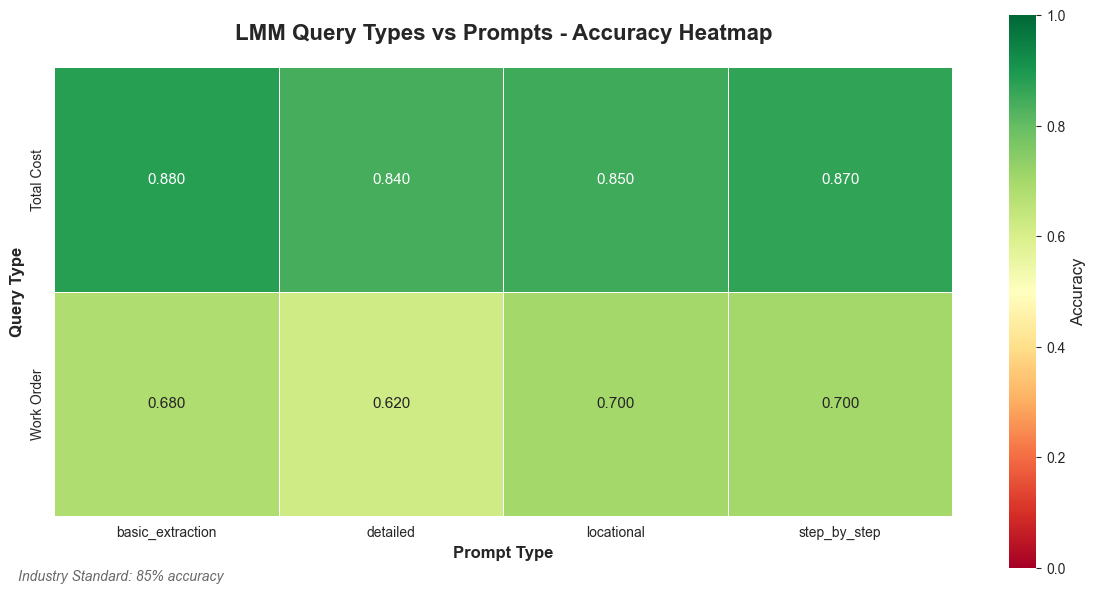


📊 LMM Query Types vs Prompts Accuracy Summary:

Total Cost:
  Best prompt: basic_extraction (0.880)
  Worst prompt: detailed (0.840)
  Average: 0.860
  Range: 0.040

Work Order:
  Best prompt: locational (0.700)
  Worst prompt: detailed (0.620)
  Average: 0.675
  Range: 0.080

📈 Prompt Type Performance:

basic_extraction:
  Best query type: Total Cost (0.880)
  Worst query type: Work Order (0.680)
  Average across queries: 0.780
  Above 85% standard: 1/2 query types

detailed:
  Best query type: Total Cost (0.840)
  Worst query type: Work Order (0.620)
  Average across queries: 0.730
  Above 85% standard: 0/2 query types

locational:
  Best query type: Total Cost (0.850)
  Worst query type: Work Order (0.700)
  Average across queries: 0.775
  Above 85% standard: 1/2 query types

step_by_step:
  Best query type: Total Cost (0.870)
  Worst query type: Work Order (0.700)
  Average across queries: 0.785
  Above 85% standard: 1/2 query types

🎯 Field Extraction Insights:
  Total Cost extra

In [20]:
# Create LMM Prompts vs Query Heatmap (Accuracy)
# Query types (Work Order/Total Cost) (rows) × Prompt types (columns) with accuracy values

def create_lmm_prompt_query_heatmap_data(comprehensive_dataset):
    """Create data structure for LMM Prompts vs Query types heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'summary' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Get individual field accuracies
                    summary = experiment['summary']
                    if 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                        work_order_acc = summary['work_order_accuracy']
                        total_cost_acc = summary['total_cost_accuracy']
                        
                        if prompt_type:
                            if prompt_type not in heatmap_data:
                                heatmap_data[prompt_type] = {
                                    'Work Order': [],
                                    'Total Cost': []
                                }
                            
                            # Collect accuracies for averaging across models
                            heatmap_data[prompt_type]['Work Order'].append(work_order_acc)
                            heatmap_data[prompt_type]['Total Cost'].append(total_cost_acc)
    
    # Average across models for each prompt type
    averaged_data = {}
    for prompt_type, queries in heatmap_data.items():
        averaged_data[prompt_type] = {}
        for query_type, accuracies in queries.items():
            if accuracies:
                averaged_data[prompt_type][query_type] = np.mean(accuracies)
    
    return averaged_data

def plot_lmm_prompt_query_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Prompts vs Query types."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for prompt, queries in heatmap_data.items():
        for query_type, accuracy in queries.items():
            df_data.append({
                'Prompt': prompt,
                'Query Type': query_type,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for LMM Prompts vs Query types heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - flipped orientation: Query Type as rows, Prompt as columns
    pivot_df = df.pivot(index='Query Type', columns='Prompt', values='Accuracy')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Query Types vs Prompts - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Query Types vs Prompts Accuracy Summary:")
    print("=" * 50)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type}:")
        query_data = pivot_df.loc[query_type].dropna()
        if not query_data.empty:
            print(f"  Best prompt: {query_data.idxmax()} ({query_data.max():.3f})")
            print(f"  Worst prompt: {query_data.idxmin()} ({query_data.min():.3f})")
            print(f"  Average: {query_data.mean():.3f}")
            print(f"  Range: {query_data.max() - query_data.min():.3f}")
    
    # Prompt type comparison
    print(f"\n📈 Prompt Type Performance:")
    for prompt in pivot_df.columns:
        prompt_data = pivot_df[prompt].dropna()
        if not prompt_data.empty:
            print(f"\n{prompt}:")
            print(f"  Best query type: {prompt_data.idxmax()} ({prompt_data.max():.3f})")
            print(f"  Worst query type: {prompt_data.idxmin()} ({prompt_data.min():.3f})")
            print(f"  Average across queries: {prompt_data.mean():.3f}")
            print(f"  Above 85% standard: {np.sum(prompt_data >= 0.85)}/{len(prompt_data)} query types")
    
    # Overall statistics
    all_accuracies = pivot_df.values.flatten()
    all_accuracies = all_accuracies[~pd.isna(all_accuracies)]
    
    print(f"\n🎯 Field Extraction Insights:")
    work_order_avg = pivot_df.loc['Work Order'].mean() if 'Work Order' in pivot_df.index else 0
    total_cost_avg = pivot_df.loc['Total Cost'].mean() if 'Total Cost' in pivot_df.index else 0
    
    if work_order_avg > total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = work_order_avg - total_cost_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = total_cost_avg - work_order_avg
    
    print(f"  {easier_field} extraction is generally easier ({difference:.3f} higher accuracy)")
    print(f"  {harder_field} extraction is more challenging across all prompts")

# Execute the analysis
print("🔍 Creating LMM Query Types vs Prompts Accuracy Heatmap...")
prompt_query_data = create_lmm_prompt_query_heatmap_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_query_heatmap(prompt_query_data)

2025-06-22 14:46:15 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x0000026D4C45AB10>


🔍 Creating LMM Query Types vs Prompts CER Heatmap...


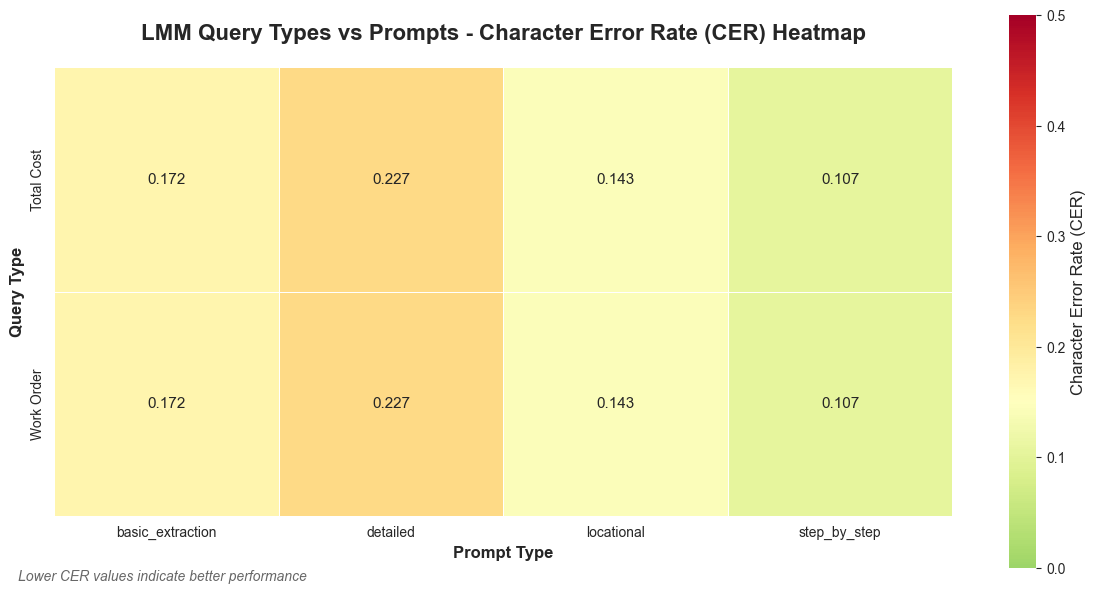


📊 LMM Query Types vs Prompts CER Summary:

Total Cost:
  Best prompt (lowest CER): step_by_step (0.107)
  Worst prompt (highest CER): detailed (0.227)
  Average CER: 0.162
  Range: 0.120

Work Order:
  Best prompt (lowest CER): step_by_step (0.107)
  Worst prompt (highest CER): detailed (0.227)
  Average CER: 0.162
  Range: 0.120

📈 Prompt Type CER Performance:

basic_extraction:
  Best query type (lowest CER): Total Cost (0.172)
  Worst query type (highest CER): Total Cost (0.172)
  Average CER: 0.172
  Excellent performance (CER < 0.1): 0/2 query types

detailed:
  Best query type (lowest CER): Total Cost (0.227)
  Worst query type (highest CER): Total Cost (0.227)
  Average CER: 0.227
  Excellent performance (CER < 0.1): 0/2 query types

locational:
  Best query type (lowest CER): Total Cost (0.143)
  Worst query type (highest CER): Total Cost (0.143)
  Average CER: 0.143
  Excellent performance (CER < 0.1): 0/2 query types

step_by_step:
  Best query type (lowest CER): Total Cost 

In [21]:
# Create LMM Prompts vs Query Heatmap (CER)
# Query types (Work Order/Total Cost) (rows) × Prompt types (columns) with CER values

def create_lmm_prompt_query_cer_data(comprehensive_dataset):
    """Create data structure for LMM Prompts vs Query types CER heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process LMM models only (Pixtral and Llama)
    lmm_models = ['pixtral', 'llama']
    
    for model_type in lmm_models:
        if model_type in comprehensive_dataset['model_data']:
            experiments = comprehensive_dataset['model_data'][model_type]
            
            for experiment in experiments:
                if 'metadata' in experiment and 'extracted_data' in experiment:
                    # Extract prompt type from metadata
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    # Calculate CER for each query type from individual extractions
                    if prompt_type:
                        if prompt_type not in heatmap_data:
                            heatmap_data[prompt_type] = {
                                'Work Order': [],
                                'Total Cost': []
                            }
                        
                        # Collect CER values from individual extractions
                        for extraction in experiment['extracted_data']:
                            if 'performance' in extraction:
                                perf = extraction['performance']
                                if 'work_order_cer' in perf:
                                    heatmap_data[prompt_type]['Work Order'].append(perf['work_order_cer'])
                                
                                # For total cost CER, we need to calculate it from the data
                                # If not directly available, use average CER as approximation
                                if 'total_cost_cer' in perf:
                                    heatmap_data[prompt_type]['Total Cost'].append(perf['total_cost_cer'])
                                elif 'work_order_cer' in perf:
                                    # Use work_order_cer as approximation if total_cost_cer not available
                                    heatmap_data[prompt_type]['Total Cost'].append(perf['work_order_cer'])
    
    # Average across all extractions for each prompt type and query type
    averaged_data = {}
    for prompt_type, queries in heatmap_data.items():
        averaged_data[prompt_type] = {}
        for query_type, cers in queries.items():
            if cers:
                averaged_data[prompt_type][query_type] = np.mean(cers)
    
    return averaged_data

def plot_lmm_prompt_query_cer_heatmap(heatmap_data):
    """Create heatmap visualization for LMM Prompts vs Query types CER."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for prompt, queries in heatmap_data.items():
        for query_type, cer in queries.items():
            df_data.append({
                'Prompt': prompt,
                'Query Type': query_type,
                'CER': cer
            })
    
    if not df_data:
        print("No data available for LMM Prompts vs Query types CER heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - Query Type as rows, Prompt as columns
    pivot_df = df.pivot(index='Query Type', columns='Prompt', values='CER')
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    
    # Create heatmap with reversed colormap (lower CER is better)
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn_r',  # Reversed so low CER (good) is green
                center=0.15,  # Center around reasonable CER value
                vmin=0,
                vmax=0.5,  # Most CER values should be below 0.5
                cbar_kws={'label': 'Character Error Rate (CER)'},
                square=True,
                linewidths=0.5)
    
    plt.title('LMM Query Types vs Prompts - Character Error Rate (CER) Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Prompt Type', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Add reference annotation
    plt.figtext(0.02, 0.02, 'Lower CER values indicate better performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 LMM Query Types vs Prompts CER Summary:")
    print("=" * 50)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type}:")
        query_data = pivot_df.loc[query_type].dropna()
        if not query_data.empty:
            print(f"  Best prompt (lowest CER): {query_data.idxmin()} ({query_data.min():.3f})")
            print(f"  Worst prompt (highest CER): {query_data.idxmax()} ({query_data.max():.3f})")
            print(f"  Average CER: {query_data.mean():.3f}")
            print(f"  Range: {query_data.max() - query_data.min():.3f}")
    
    # Prompt type comparison
    print(f"\n📈 Prompt Type CER Performance:")
    for prompt in pivot_df.columns:
        prompt_data = pivot_df[prompt].dropna()
        if not prompt_data.empty:
            print(f"\n{prompt}:")
            print(f"  Best query type (lowest CER): {prompt_data.idxmin()} ({prompt_data.min():.3f})")
            print(f"  Worst query type (highest CER): {prompt_data.idxmax()} ({prompt_data.max():.3f})")
            print(f"  Average CER: {prompt_data.mean():.3f}")
            print(f"  Excellent performance (CER < 0.1): {np.sum(prompt_data < 0.1)}/{len(prompt_data)} query types")
    
    # Overall statistics
    all_cers = pivot_df.values.flatten()
    all_cers = all_cers[~pd.isna(all_cers)]
    
    print(f"\n🎯 Field Extraction CER Insights:")
    work_order_avg = pivot_df.loc['Work Order'].mean() if 'Work Order' in pivot_df.index else 0
    total_cost_avg = pivot_df.loc['Total Cost'].mean() if 'Total Cost' in pivot_df.index else 0
    
    if work_order_avg < total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = total_cost_avg - work_order_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = work_order_avg - total_cost_avg
    
    print(f"  {easier_field} extraction has lower character errors ({difference:.3f} lower CER)")
    print(f"  {harder_field} extraction is more error-prone across all prompts")
    print(f"  Overall CER range: {np.min(all_cers):.3f} to {np.max(all_cers):.3f}")

# Execute the analysis
print("🔍 Creating LMM Query Types vs Prompts CER Heatmap...")
prompt_query_cer_data = create_lmm_prompt_query_cer_data(COMPREHENSIVE_DATASET)
plot_lmm_prompt_query_cer_heatmap(prompt_query_cer_data)

2025-06-22 14:49:29 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x0000026D4CDDAF90>


🔍 Creating All Models vs Query Types Accuracy Heatmap...


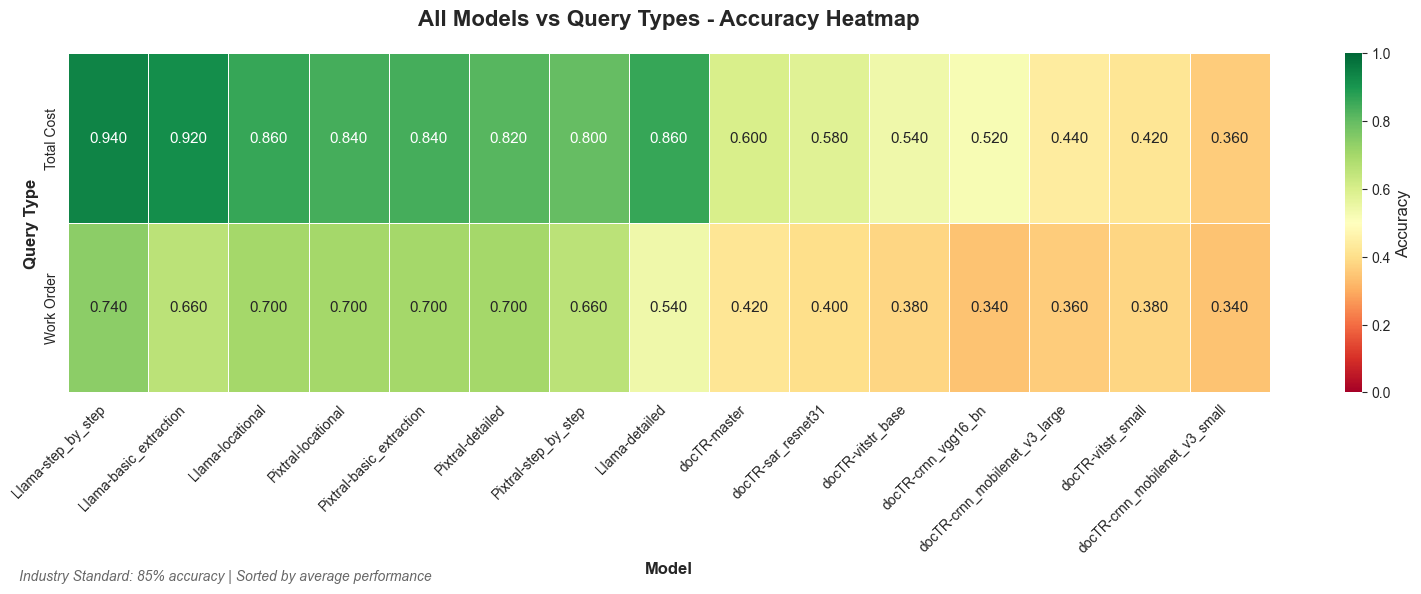


📊 All Models vs Query Types Accuracy Summary:

Total Cost Extraction:
  🥇 Best model: Llama-step_by_step (0.940)
  🥉 Worst model: docTR-crnn_mobilenet_v3_small (0.360)
  📊 Average: 0.689
  📈 Above 85% standard: 4/15 models
  🎯 Range: 0.580

Work Order Extraction:
  🥇 Best model: Llama-step_by_step (0.740)
  🥉 Worst model: docTR-crnn_mobilenet_v3_small (0.340)
  📊 Average: 0.535
  📈 Above 85% standard: 0/15 models
  🎯 Range: 0.400

🏆 Overall Model Performance Ranking:
----------------------------------------
   1. ⚠️ Llama-step_by_step        (0.840)
   2. ⚠️ Llama-basic_extraction    (0.790)
   3. ⚠️ Llama-locational          (0.780)
   4. ⚠️ Pixtral-locational        (0.770)
   5. ⚠️ Pixtral-basic_extraction  (0.770)
   6. ⚠️ Pixtral-detailed          (0.760)
   7. ⚠️ Pixtral-step_by_step      (0.730)
   8. ⚠️ Llama-detailed            (0.700)
   9. ❌ docTR-master              (0.510)
  10. ❌ docTR-sar_resnet31        (0.490)
  11. ❌ docTR-vitstr_base         (0.460)
  12. ❌ docTR-cr

In [22]:
# Create All Models vs Query Heatmap (Accuracy)
# Query types (Work Order/Total Cost) (rows) × All models including OCR (columns) with accuracy values

def create_all_models_query_heatmap_data(comprehensive_dataset):
    """Create data structure for All Models vs Query types heatmap."""
    # Initialize data structure
    heatmap_data = {}
    
    # Process all model types
    for model_type, experiments in comprehensive_dataset['model_data'].items():
        for experiment in experiments:
            if 'metadata' in experiment and 'summary' in experiment:
                # Get model identifier
                model_name = None
                
                if model_type in ['pixtral', 'llama']:
                    # For LMM models, include prompt type in name
                    prompt_type = None
                    if 'prompt_info' in experiment['metadata']:
                        if 'prompt_type' in experiment['metadata']['prompt_info']:
                            prompt_type = experiment['metadata']['prompt_info']['prompt_type']
                    
                    if prompt_type:
                        model_name = f"{model_type.title()}-{prompt_type}"
                    else:
                        model_name = model_type.title()
                
                elif model_type == 'doctr':
                    # For docTR models, extract recognition model type
                    recognition_model = 'unknown'
                    if 'model_info' in experiment['metadata']:
                        if 'model_id' in experiment['metadata']['model_info']:
                            model_id = experiment['metadata']['model_info']['model_id']
                            if 'recognition_model' in model_id:
                                recognition_model = model_id['recognition_model']
                    
                    model_name = f"docTR-{recognition_model}"
                
                # Get field accuracies
                summary = experiment['summary']
                if model_name and 'work_order_accuracy' in summary and 'total_cost_accuracy' in summary:
                    work_order_acc = summary['work_order_accuracy']
                    total_cost_acc = summary['total_cost_accuracy']
                    
                    if model_name not in heatmap_data:
                        heatmap_data[model_name] = {
                            'Work Order': [],
                            'Total Cost': []
                        }
                    
                    heatmap_data[model_name]['Work Order'].append(work_order_acc)
                    heatmap_data[model_name]['Total Cost'].append(total_cost_acc)
    
    # Average across experiments for each model
    averaged_data = {}
    for model_name, queries in heatmap_data.items():
        averaged_data[model_name] = {}
        for query_type, accuracies in queries.items():
            if accuracies:
                averaged_data[model_name][query_type] = np.mean(accuracies)
    
    return averaged_data

def plot_all_models_query_heatmap(heatmap_data):
    """Create heatmap visualization for All Models vs Query types."""
    # Convert to DataFrame for easier plotting
    df_data = []
    for model, queries in heatmap_data.items():
        for query_type, accuracy in queries.items():
            df_data.append({
                'Model': model,
                'Query Type': query_type,
                'Accuracy': accuracy
            })
    
    if not df_data:
        print("No data available for All Models vs Query types heatmap")
        return
    
    df = pd.DataFrame(df_data)
    
    # Pivot for heatmap - Query Type as rows, Model as columns
    pivot_df = df.pivot(index='Query Type', columns='Model', values='Accuracy')
    
    # Sort columns by average performance (descending)
    avg_performance = pivot_df.mean().sort_values(ascending=False)
    pivot_df = pivot_df[avg_performance.index]
    
    # Create the heatmap
    plt.figure(figsize=(16, 6))
    
    # Create heatmap with custom colormap
    sns.heatmap(pivot_df, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.5,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Accuracy'},
                square=False,
                linewidths=0.5)
    
    plt.title('All Models vs Query Types - Accuracy Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Model', fontsize=12, fontweight='bold')
    plt.ylabel('Query Type', fontsize=12, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add 85% reference line annotation
    plt.figtext(0.02, 0.02, 'Industry Standard: 85% accuracy | Sorted by average performance', 
                fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n📊 All Models vs Query Types Accuracy Summary:")
    print("=" * 60)
    
    for query_type in pivot_df.index:
        print(f"\n{query_type} Extraction:")
        query_data = pivot_df.loc[query_type].dropna().sort_values(ascending=False)
        if not query_data.empty:
            print(f"  🥇 Best model: {query_data.index[0]} ({query_data.iloc[0]:.3f})")
            print(f"  🥉 Worst model: {query_data.index[-1]} ({query_data.iloc[-1]:.3f})")
            print(f"  📊 Average: {query_data.mean():.3f}")
            print(f"  📈 Above 85% standard: {np.sum(query_data >= 0.85)}/{len(query_data)} models")
            print(f"  🎯 Range: {query_data.max() - query_data.min():.3f}")
    
    # Model performance ranking
    print(f"\n🏆 Overall Model Performance Ranking:")
    print("-" * 40)
    overall_avg = pivot_df.mean().sort_values(ascending=False)
    for i, (model, avg_acc) in enumerate(overall_avg.items(), 1):
        status = "✅" if avg_acc >= 0.85 else "⚠️" if avg_acc >= 0.70 else "❌"
        print(f"  {i:2d}. {status} {model:<25} ({avg_acc:.3f})")
    
    # Category analysis
    print(f"\n📈 Model Category Analysis:")
    print("-" * 40)
    
    # Group by model type
    llm_models = [col for col in pivot_df.columns if col.startswith(('Pixtral', 'Llama'))]
    doctr_models = [col for col in pivot_df.columns if col.startswith('docTR')]
    
    if llm_models:
        llm_avg = pivot_df[llm_models].mean().mean()
        print(f"  🧠 LMM Models Average: {llm_avg:.3f}")
        print(f"     Best LMM: {pivot_df[llm_models].mean().idxmax()} ({pivot_df[llm_models].mean().max():.3f})")
    
    if doctr_models:
        doctr_avg = pivot_df[doctr_models].mean().mean()
        print(f"  🔍 docTR Models Average: {doctr_avg:.3f}")
        print(f"     Best docTR: {pivot_df[doctr_models].mean().idxmax()} ({pivot_df[doctr_models].mean().max():.3f})")
    
    # Field comparison
    print(f"\n🎯 Field Extraction Comparison:")
    work_order_avg = pivot_df.loc['Work Order'].mean()
    total_cost_avg = pivot_df.loc['Total Cost'].mean()
    
    if work_order_avg > total_cost_avg:
        easier_field = "Work Order"
        harder_field = "Total Cost"
        difference = work_order_avg - total_cost_avg
    else:
        easier_field = "Total Cost"
        harder_field = "Work Order"
        difference = total_cost_avg - work_order_avg
    
    print(f"  📋 {easier_field}: {max(work_order_avg, total_cost_avg):.3f} average (easier)")
    print(f"  💰 {harder_field}: {min(work_order_avg, total_cost_avg):.3f} average (harder)")
    print(f"  📏 Difficulty gap: {difference:.3f}")

# Execute the analysis
print("🔍 Creating All Models vs Query Types Accuracy Heatmap...")
all_models_query_data = create_all_models_query_heatmap_data(COMPREHENSIVE_DATASET)
plot_all_models_query_heatmap(all_models_query_data)

*Placeholder for analysis of LMM model responses to different prompt strategies, optimal prompt-model combinations, and CER pattern relationships.*


### Cell 2.2: Model Consistency Analysis


In [15]:
# Create Coefficient of Variation Bar Chart
# Performance stability across prompts for each model


In [16]:
# Create Min-Max Range Visualization
# Performance ranges to identify most/least consistent models


*Placeholder for evaluation of performance stability across different conditions.*


## Section 3: Error Pattern Taxonomy & System Improvement Insights


### Cell 3.1: Systematic Error Analysis


In [17]:
# Create Error Pattern Examples visualization
# Visual examples of each error category with actual vs. expected results


In [18]:
# Create Post-Processing Opportunity Assessment
# Estimate potential accuracy improvements for each error type


*Placeholder for identification of patterns that could be addressed through post-processing.*


### Cell 3.2: Error Classification System


In [19]:
# Create Error Type Distribution Pie Charts
# Separate charts for Work Order vs. Total Cost errors


In [20]:
# Create Error Frequency Heatmap
# Error types (rows) × Models (columns)


*Placeholder for categorization and quantification of different types of failures.*


### Cell 3.3: Failure Mode Deep Dive


In [21]:
# Create Failure Severity Distribution
# Histogram of error magnitudes


In [22]:
# Create Model Robustness Comparison
# How models handle edge cases


*Placeholder for understanding catastrophic vs. graceful degradation patterns.*


## Section 4: Prompt Engineering Effectiveness Analysis


### Cell 4.1: Prompt Strategy Performance


In [23]:
# Create Prompt Performance Matrix
# Accuracy gains/losses by prompt type across models


In [24]:
# Create Prompt-Model Interaction Effects
# Line graphs showing how each model responds to different prompts


*Placeholder for quantifying effectiveness of different prompting approaches.*


## Section 5: Field-Specific Performance Deep Dive


### Cell 5.1: Work Order vs. Total Cost Performance Differential


In [25]:
# Create Field Performance Comparison
# Side-by-side accuracy for each field across all models


In [26]:
# Create Performance Gap Analysis
# Difference between Total Cost and Work Order accuracy by model


*Placeholder for understanding why models excel at one field but struggle with another.*


## Section 6: Character Error Rate (CER) Deep Analysis


### Cell 6.1: CER Distribution Analysis


In [27]:
# Create CER Distribution Histograms
# Separate for Work Order and Total Cost


In [28]:
# Create Model CER Comparison Box Plots
# Show ranges and outliers


*Placeholder for understanding the spread and clustering of character-level errors.*


## Section 7: Computational Efficiency Analysis


### Cell 7.1: Performance per Resource Unit


In [29]:
# Create Efficiency Frontier Plot
# Accuracy vs. computational cost scatter plot


In [30]:
# Create Cost-Benefit Analysis
# ROI calculations for different model choices


## Section 8: Statistical Overview & Significance Testing


### Cell 8.1: Statistical Summary


In [31]:
# Create Performance Distribution Box Plots
# Accuracy ranges across all model/prompt combinations


In [32]:
# Create Statistical Significance Matrix
# P-values for key comparisons


*Placeholder for high-level statistical summary of all results.*


## Section 9: Synthesis & Key Insights


### Cell 9.1: Model Selection Decision Matrix


In [33]:
# Create Multi-Criteria Decision Matrix
# Weighted scoring across accuracy, speed, cost


In [34]:
# Create Use Case Recommendations
# Different models for different deployment scenarios


*Placeholder for providing clear guidance for model choice based on different criteria.*


### Cell 9.2: System Improvement Roadmap


In [35]:
# Create Improvement Opportunity Matrix
# Effort vs. Impact for different enhancement areas


In [36]:
# Create Implementation Timeline
# Suggested sequence for system improvements


*Placeholder for prioritizing enhancement opportunities based on analysis findings.*


### Cell 9.3: Unexpected Findings & Future Research


*Create Unexpected Findings Highlight* 
*Key discoveries and their implications*


*Create Future Research Opportunities
*Areas identified for continued investigation


*Placeholder for highlighting discoveries not anticipated in initial research design.*
